# Problem Statement : 
## Perform Clustering (Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### Data Description:

#### Murder - Muder rates in different places of United States
#### Assualt - Assualt rate in different places of United States
#### UrbanPop - urban population in different places of United States
#### Rape - Rape rate in different places of United States
----

### Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering

### Import Data

In [2]:
crime_data = pd.read_csv("crime_data.csv")
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime_data.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


### Data Understanding

In [5]:
crime_data.shape

(50, 5)

In [6]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [8]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
crime_data.rename(columns={'Unnamed: 0':'City'}, inplace = True)

In [11]:
crime_data

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### Data Visualization

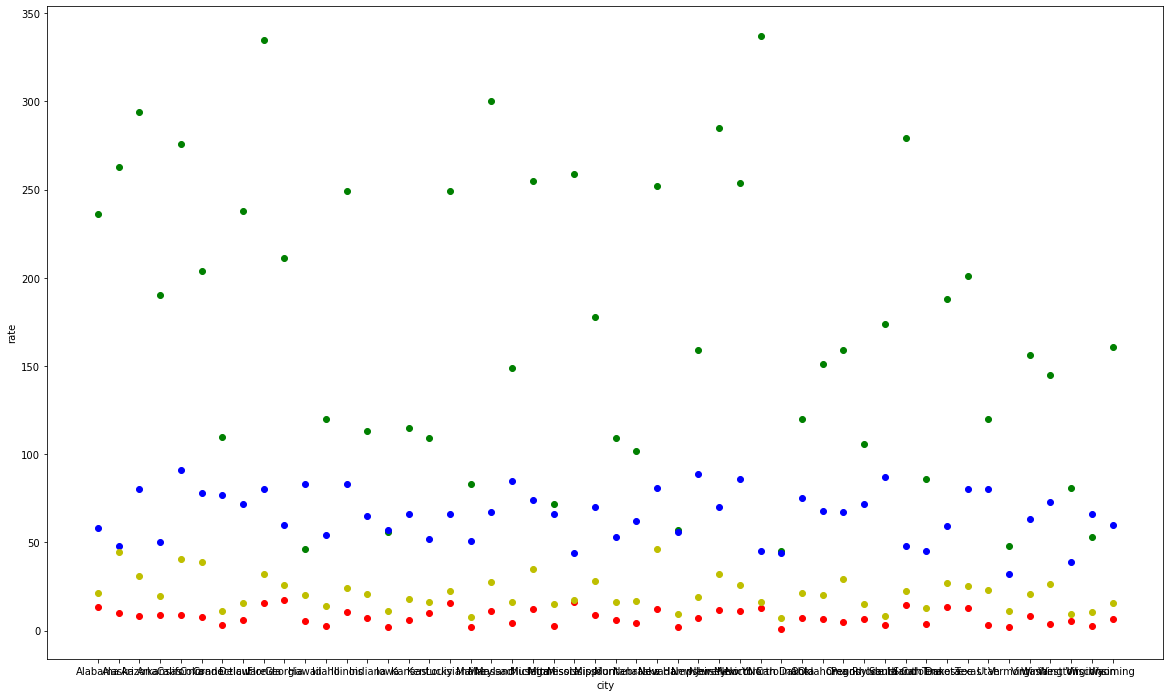

In [12]:
plt.figure(figsize=(20,12))
plt.scatter(crime_data.City, crime_data.Murder, color='r')
plt.scatter(crime_data.City, crime_data.Assault, color='g')
plt.scatter(crime_data.City, crime_data.UrbanPop, color='b')
plt.scatter(crime_data.City,crime_data.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

### Data Preprocessing

In [13]:
crime_data.drop(['City'],axis=1,inplace=True)

In [14]:
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(crime_data.iloc[:,0:])
print(scaled_crime_data)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

### K Means Clustering :

###  Finding out the optimal number of clusters

#### The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

### Elbow Method :

In [15]:
wcssd = [] # wcss = within cluster sum of squared distance
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12121)
    kmeans.fit(scaled_crime_data)
    wcssd.append(kmeans.inertia_)
wcssd

[200.0,
 104.96163315756871,
 79.95548163171662,
 57.55425863091104,
 50.07656289493946,
 45.984464392671676,
 41.0628596680719,
 36.45971130448512,
 32.01256628808056,
 28.372331658997044]

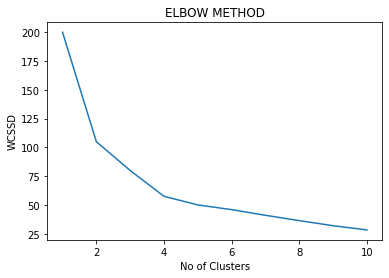

In [16]:
plt.plot(range(1,11),wcssd)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSSD')
plt.show()

### The plot levels off at 4 and let's use it to determine the clusters as K = 4

### Analysing the data with number of clusters = 4 

In [17]:
clusters_new = KMeans(n_clusters=4, random_state=12121)
clusters_new.fit(scaled_crime_data)

KMeans(n_clusters=4, random_state=12121)

In [18]:
clusters_new.labels_

array([1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 0,
       2, 1, 0, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3,
       2, 3, 3, 2, 2, 3])

In [19]:
#Assign clusters to the data set
crime_data['kmeans_cluster_id'] = clusters_new.labels_

In [20]:
crime_data

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,1


In [21]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [22]:
crime_data.groupby('kmeans_cluster_id').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
kmeans_cluster_id,,,,
0,10.815385,257.384615,76.000000,33.192308
1,13.937500,243.625000,53.750000,21.412500
2,3.600000,78.538462,52.076923,12.176923
3,5.656250,138.875000,73.875000,18.781250


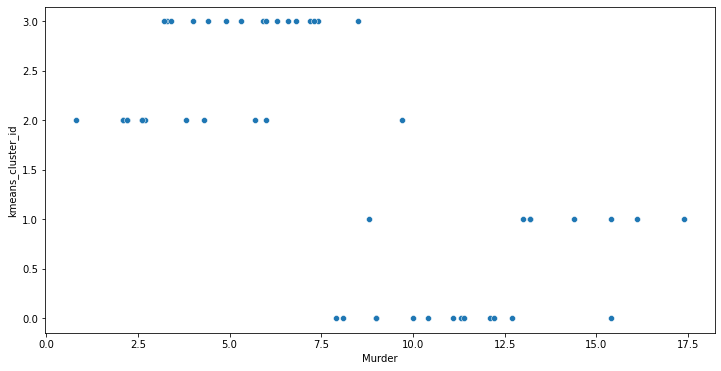

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_data['Murder'], y = crime_data['kmeans_cluster_id'])
plt.show()

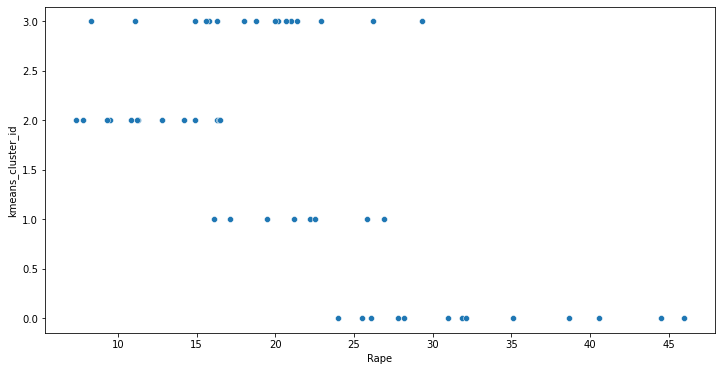

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_data['Rape'], y =crime_data['kmeans_cluster_id'])
plt.show()

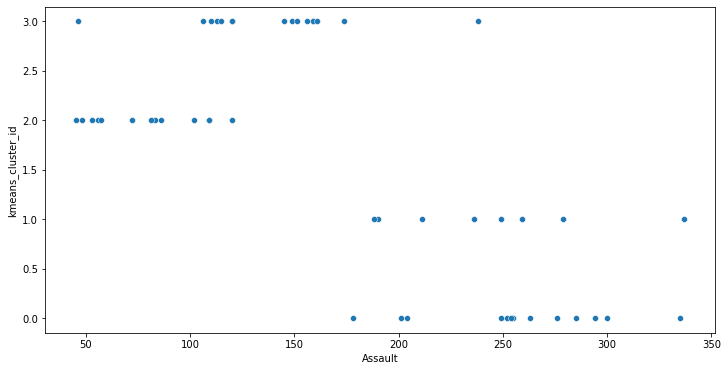

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_data['Assault'], y =crime_data['kmeans_cluster_id'])
plt.show()

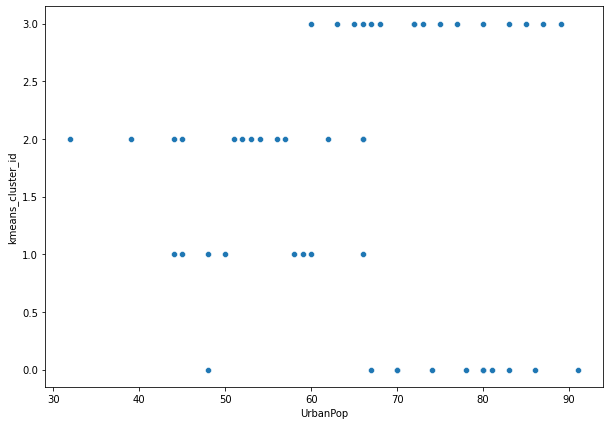

In [26]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(x=crime_data['UrbanPop'], y =crime_data['kmeans_cluster_id'])
plt.show()

In [27]:
stats = crime_data.sort_values("kmeans_cluster_id", ascending=True)
crime_data_clusters = pd.DataFrame(stats)

In [28]:
crime_data_clusters

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id
24,9.0,178,70,28.2,0
27,12.2,252,81,46.0,0
12,10.4,249,83,24.0,0
30,11.4,285,70,32.1,0
31,11.1,254,86,26.1,0
21,12.1,255,74,35.1,0
8,15.4,335,80,31.9,0
5,7.9,204,78,38.7,0
4,9.0,276,91,40.6,0
42,12.7,201,80,25.5,0


In [29]:
crime_data[crime_data['kmeans_cluster_id']==0]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
8,15.4,335,80,31.9,0
12,10.4,249,83,24.0,0
19,11.3,300,67,27.8,0
21,12.1,255,74,35.1,0
24,9.0,178,70,28.2,0
27,12.2,252,81,46.0,0


In [30]:
crime_data[crime_data['kmeans_cluster_id']==1]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id
0,13.2,236,58,21.2,1
3,8.8,190,50,19.5,1
9,17.4,211,60,25.8,1
17,15.4,249,66,22.2,1
23,16.1,259,44,17.1,1
32,13.0,337,45,16.1,1
39,14.4,279,48,22.5,1
41,13.2,188,59,26.9,1


In [31]:
crime_data[crime_data['kmeans_cluster_id']==2]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id
11,2.6,120,54,14.2,2
14,2.2,56,57,11.3,2
16,9.7,109,52,16.3,2
18,2.1,83,51,7.8,2
22,2.7,72,66,14.9,2
25,6.0,109,53,16.4,2
26,4.3,102,62,16.5,2
28,2.1,57,56,9.5,2
33,0.8,45,44,7.3,2
40,3.8,86,45,12.8,2


In [32]:
crime_data[crime_data['kmeans_cluster_id']==3]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,3
10,5.3,46,83,20.2,3
13,7.2,113,65,21.0,3
15,6.0,115,66,18.0,3
20,4.4,149,85,16.3,3
29,7.4,159,89,18.8,3
34,7.3,120,75,21.4,3
35,6.6,151,68,20.0,3
36,4.9,159,67,29.3,3


-----

### DBSCAN

In [33]:
dbscan = DBSCAN(eps=1,min_samples=4)
dbscan.fit(scaled_crime_data)

DBSCAN(eps=1, min_samples=4)

In [34]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

### Noisy samples are given the label -1.
----

In [35]:
crime_data['dbscan_clusters']=dbscan.labels_
crime_data

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters
0,13.2,236,58,21.2,1,0
1,10.0,263,48,44.5,0,-1
2,8.1,294,80,31.0,0,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,0,-1
5,7.9,204,78,38.7,0,-1
6,3.3,110,77,11.1,3,1
7,5.9,238,72,15.8,3,-1
8,15.4,335,80,31.9,0,-1
9,17.4,211,60,25.8,1,-1


In [36]:
crime_data.groupby('dbscan_clusters').agg(['mean']).reset_index()

,dbscan_clusters,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id
,,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,0.555556
1,0,14.050000,238.000000,57.750000,23.200000,1.000000
2,1,4.825000,112.035714,63.357143,16.107143,2.428571


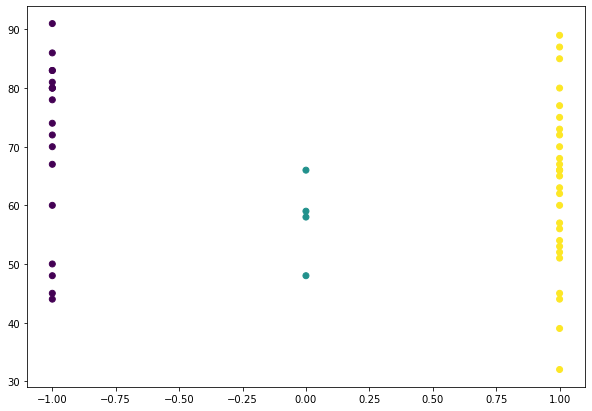

In [37]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data['dbscan_clusters'],crime_data['UrbanPop'], c=dbscan.labels_) 
plt.show()

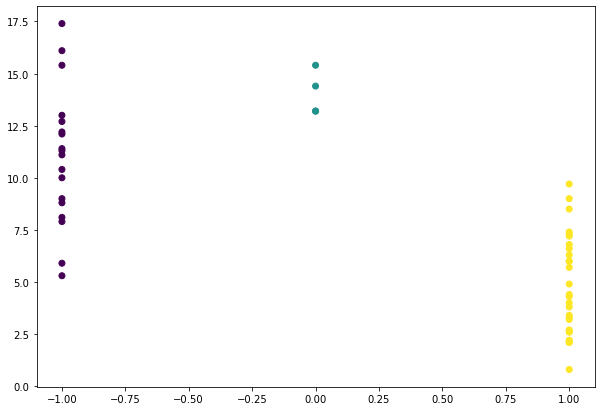

In [38]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data['dbscan_clusters'],crime_data['Murder'], c=dbscan.labels_) 
plt.show()

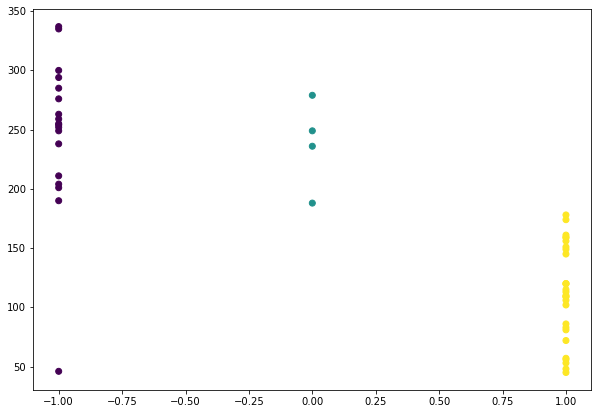

In [39]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data['dbscan_clusters'],crime_data['Assault'], c=dbscan.labels_) 
plt.show()

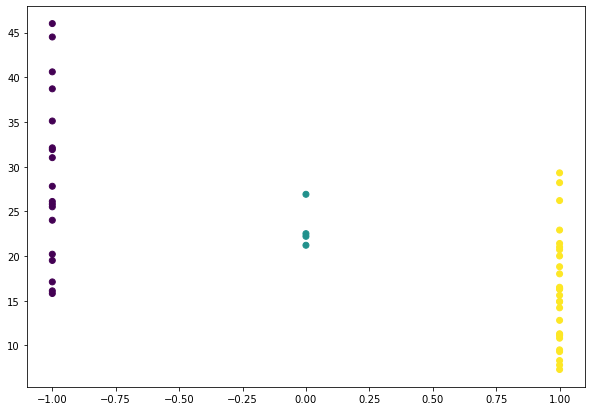

In [40]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data['dbscan_clusters'],crime_data['Rape'], c=dbscan.labels_) 
plt.show()

In [41]:
stats = crime_data.sort_values("dbscan_clusters", ascending=True)
crime_data_clusters = pd.DataFrame(stats)

crime_data_clusters

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters
42,12.7,201,80,25.5,0,-1
30,11.4,285,70,32.1,0,-1
27,12.2,252,81,46.0,0,-1
23,16.1,259,44,17.1,1,-1
21,12.1,255,74,35.1,0,-1
19,11.3,300,67,27.8,0,-1
31,11.1,254,86,26.1,0,-1
12,10.4,249,83,24.0,0,-1
10,5.3,46,83,20.2,3,-1
32,13.0,337,45,16.1,1,-1


In [42]:
crime_data[crime_data['dbscan_clusters']==-1]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters
1,10.0,263,48,44.5,0,-1
2,8.1,294,80,31.0,0,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,0,-1
5,7.9,204,78,38.7,0,-1
7,5.9,238,72,15.8,3,-1
8,15.4,335,80,31.9,0,-1
9,17.4,211,60,25.8,1,-1
10,5.3,46,83,20.2,3,-1
12,10.4,249,83,24.0,0,-1


In [43]:
crime_data[crime_data['dbscan_clusters']==0]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters
0,13.2,236,58,21.2,1,0
17,15.4,249,66,22.2,1,0
39,14.4,279,48,22.5,1,0
41,13.2,188,59,26.9,1,0


In [44]:
crime_data[crime_data['dbscan_clusters']==1]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters
6,3.3,110,77,11.1,3,1
11,2.6,120,54,14.2,2,1
13,7.2,113,65,21.0,3,1
14,2.2,56,57,11.3,2,1
15,6.0,115,66,18.0,3,1
16,9.7,109,52,16.3,2,1
18,2.1,83,51,7.8,2,1
20,4.4,149,85,16.3,3,1
22,2.7,72,66,14.9,2,1
24,9.0,178,70,28.2,0,1


----

### Hierarchical Clustering

### Dendrograms

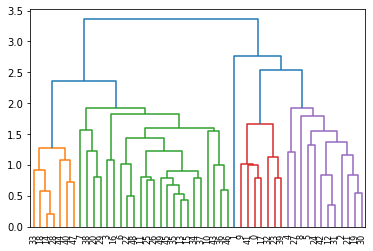

In [45]:
dgm_avg = sch.dendrogram(sch.linkage(scaled_crime_data, method = 'average' ))

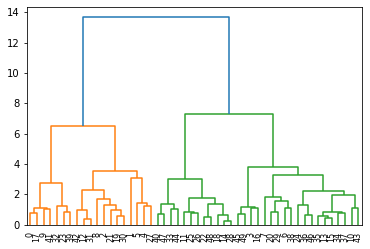

In [46]:
dgm_ward = sch.dendrogram(sch.linkage(scaled_crime_data, method = 'ward' ))

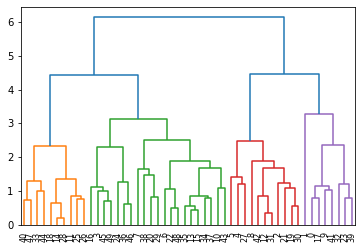

In [47]:
dgm_cmplt = sch.dendrogram(sch.linkage(scaled_crime_data, method = 'complete' ))

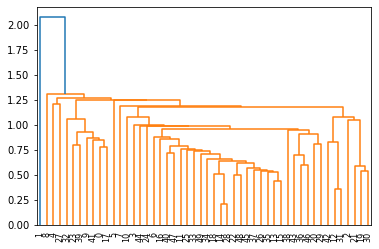

In [48]:
dgm_single = sch.dendrogram(sch.linkage(scaled_crime_data, method = 'single' ))

In [49]:
# Taking Complete as the linkage method , we get n_clusters = 5
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [50]:
y_hc = hc.fit_predict(scaled_crime_data)
y_hc

array([1, 4, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2,
       0, 1, 0, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 0, 0], dtype=int64)

In [51]:
hc_clusters=pd.DataFrame(y_hc,columns=['hc_clusters'])
hc_clusters

,hc_clusters
0,1
1,4
2,2
3,0
4,2
5,2
6,0
7,0
8,2
9,1


In [52]:
crime_data['hc_clusters'] = hc_clusters

In [53]:
stats = crime_data.sort_values("hc_clusters", ascending=True)
crime_data_clusters = pd.DataFrame(stats)

crime_data_clusters

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters,hc_clusters
24,9.0,178,70,28.2,0,1,0
46,4.0,145,73,26.2,3,1,0
45,8.5,156,63,20.7,3,1,0
43,3.2,120,80,22.9,3,1,0
38,3.4,174,87,8.3,3,1,0
37,6.3,106,72,14.9,3,1,0
36,4.9,159,67,29.3,3,1,0
35,6.6,151,68,20.0,3,1,0
34,7.3,120,75,21.4,3,1,0
29,7.4,159,89,18.8,3,1,0


In [54]:
crime_data[crime_data['hc_clusters']==0]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters,hc_clusters
3,8.8,190,50,19.5,1,-1,0
6,3.3,110,77,11.1,3,1,0
7,5.9,238,72,15.8,3,-1,0
10,5.3,46,83,20.2,3,-1,0
13,7.2,113,65,21.0,3,1,0
15,6.0,115,66,18.0,3,1,0
16,9.7,109,52,16.3,2,1,0
20,4.4,149,85,16.3,3,1,0
22,2.7,72,66,14.9,2,1,0
24,9.0,178,70,28.2,0,1,0


In [55]:
crime_data[crime_data['hc_clusters']==1]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters,hc_clusters
0,13.2,236,58,21.2,1,0,1
9,17.4,211,60,25.8,1,-1,1
17,15.4,249,66,22.2,1,0,1
23,16.1,259,44,17.1,1,-1,1
32,13.0,337,45,16.1,1,-1,1
39,14.4,279,48,22.5,1,0,1
41,13.2,188,59,26.9,1,0,1


In [56]:
crime_data[crime_data['hc_clusters']==2]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters,hc_clusters
2,8.1,294,80,31.0,0,-1,2
4,9.0,276,91,40.6,0,-1,2
5,7.9,204,78,38.7,0,-1,2
8,15.4,335,80,31.9,0,-1,2
12,10.4,249,83,24.0,0,-1,2
19,11.3,300,67,27.8,0,-1,2
21,12.1,255,74,35.1,0,-1,2
27,12.2,252,81,46.0,0,-1,2
30,11.4,285,70,32.1,0,-1,2
31,11.1,254,86,26.1,0,-1,2


In [57]:
crime_data[crime_data['hc_clusters']==3]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters,hc_clusters
11,2.6,120,54,14.2,2,1,3
14,2.2,56,57,11.3,2,1,3
18,2.1,83,51,7.8,2,1,3
25,6.0,109,53,16.4,2,1,3
26,4.3,102,62,16.5,2,1,3
28,2.1,57,56,9.5,2,1,3
33,0.8,45,44,7.3,2,1,3
40,3.8,86,45,12.8,2,1,3
44,2.2,48,32,11.2,2,1,3
47,5.7,81,39,9.3,2,1,3


In [58]:
crime_data[crime_data['hc_clusters']==4]

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters,hc_clusters
1,10.0,263,48,44.5,0,-1,4


-----

In [59]:
crime_data

,Murder,Assault,UrbanPop,Rape,kmeans_cluster_id,dbscan_clusters,hc_clusters
0,13.2,236,58,21.2,1,0,1
1,10.0,263,48,44.5,0,-1,4
2,8.1,294,80,31.0,0,-1,2
3,8.8,190,50,19.5,1,-1,0
4,9.0,276,91,40.6,0,-1,2
5,7.9,204,78,38.7,0,-1,2
6,3.3,110,77,11.1,3,1,0
7,5.9,238,72,15.8,3,-1,0
8,15.4,335,80,31.9,0,-1,2
9,17.4,211,60,25.8,1,-1,1


### Conclusion : Above is the Clustering table (Hierarchical, Kmeans & DBSCAN) for the crime data.